In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transfers = pd.read_csv(Path.cwd()/'prepped/transfers.csv')

In [4]:
def format_currency(value):
    value = value.replace('€', '')
    value = value.replace('-', '0')
    value = value.replace('Loan fee:', '')
    value = value.replace('-', '0')
    value = value.replace('?', '0')
    value = value.replace('loan transfer', '0')
    value = value.replace('free transfer', '0')
    value = value.replace('draft', '0')
    
    if value[-1] == 'm':
        value = value.replace('m', '')
        return float(value) 

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return float(value) / 1000
    if value[-1] == 'k':
        value = value.replace('k', '')
        return float(value) / 1000
    return float(value)


In [6]:
transfers

,Unnamed: 0,League,Season,Name,Full name,Age,Left,Joined,Fee,window
0,0,premier-league,17/18,Álvaro Morata,Á. Morata,24,Real Madrid,Chelsea FC,€66.00m,summer
1,1,premier-league,17/18,Tiemoué Bakayoko,T. Bakayoko,22,Monaco,Chelsea FC,€40.00m,summer
2,2,premier-league,17/18,Danny Drinkwater,D. Drinkwater,27,Leicester,Chelsea FC,€37.90m,summer
3,3,premier-league,17/18,Antonio Rüdiger,A. Rüdiger,24,AS Roma,Chelsea FC,€35.00m,summer
4,4,premier-league,17/18,Davide Zappacosta,D. Zappacosta,25,Torino,Chelsea FC,€25.00m,summer
...,...,...,...,...,...,...,...,...,...,...
4964,2,serie-a,23/24,Elayis Tavsan,E. Tavsan,22,NEC Nijmegen,Hellas Verona,€500k,winter
4965,3,serie-a,23/24,Reda Belahyane,R. Belahyane,19,OGC Nice,Hellas Verona,€500k,winter
4966,0,serie-a,23/24,Farès Ghedjemis,F. Ghedjemis,21,FC Rouen 1899,Frosinone Calcio,€300k,winter
4967,0,serie-a,23/24,Junior Messias,J. Messias,32,AC Milan,Genoa CFC,€1.50m,winter


In [8]:
transfers.Fee = transfers.Fee.apply(format_currency)

In [15]:
avg_fee = transfers.groupby(['League', 'Season'])['Fee'].mean().reset_index()

In [16]:
avg_fee

,League,Season,Fee
0,bundesliga,17/18,5.568175
1,bundesliga,18/19,4.749043
2,bundesliga,19/20,7.305391
3,bundesliga,20/21,5.045333
4,bundesliga,21/22,4.021111
5,bundesliga,22/23,3.813646
6,bundesliga,23/24,6.511500
7,laliga,17/18,6.334718
8,laliga,18/19,6.570779
9,laliga,19/20,9.636226


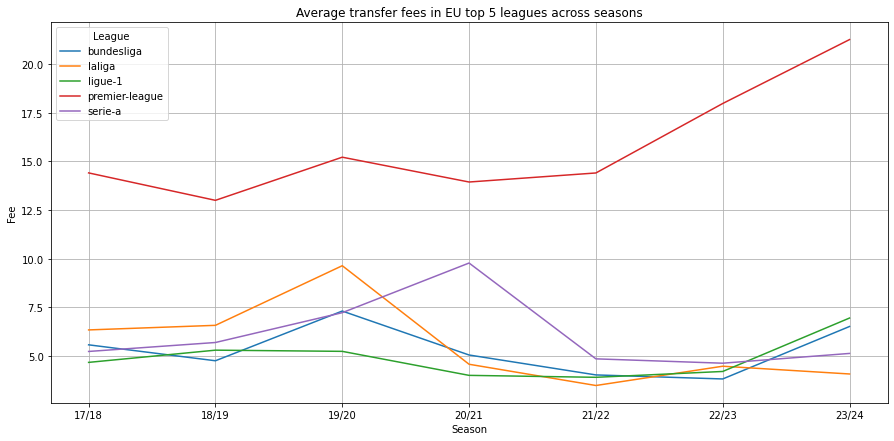

In [26]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=avg_fee, x='Season', y='Fee', hue='League')
plt.grid()
plt.title('Average transfer fees in EU top 5 leagues across seasons')
plt.show()

In [39]:
inflation = transfers.groupby(['Season'])['Fee'].mean().pct_change().reset_index()

In [40]:
inflation.columns = ['season', 'inflation']

In [41]:
inflation.to_csv('prepped/inflation.csv', index=False)